# TP Feature Selection / Regularisation

### author: Anastasios Giovanidis, 2018-2019

This is the TP related to Feature Selection / Regularisation. We will need to import the following libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_diabetes, load_linnerud
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression

In this class we will learn how to use PYTHON for regression, using the new methods that either choose a subset of features, or reduce the dimension, or shrink the coefficients. Specifically, we will study:

- Ridge Regression
- The Lasso
- Partial Least Squares (PLS)

## Preparation: Importing datasets

To do so, we will first import a dataset, with a large number of features. We need the following libraries.

- Dataset 1: Boston House Prices dataset (Linear Regression example)

In [2]:
# load_boston(): from the sklearn.datasets library
boston=load_boston()

One can read the general discription of the "Boston" dataset and find the names of Features by printing the following:

In [3]:
print(boston.keys())
#print(boston.DESCR)
#print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


We create a panda DataFrame to keep all Features in a compact format.

In [4]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print(boston_df)
#print(boston_df.info())

The response Y is actually the price of an asset found in the dataset as 'target'. We need to add this as well.

In [5]:
boston_df['Price']=boston.target

## Exercise 1 (Ridge Regression)

- Use the Boston dataset to perform Linear Regression, and afterwards, Ridge Regression with the sklearn functions. For Ridge use $\lambda = 5$ (the sklearn Ridge parameter is called alpha). Compare the two methods, based on the Mean Squared Error, $R^2$ and the coefficient values. What do you observe?


- As a second step, plot (i) the MSE test error and (ii) the values of feature coefficients, for $\lambda\in[0,25]$.

note 1: To use Ridge, you need to **rescale** the data (not the target) so that the mean is $0$ and the standard deviation is $1$.

note 2: You should also consider splitting the dataset into a Train and a Test set.

note 3: The Ridge Regression parameter is 'alpha'. For documentation, see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**Answer:**

Preparation: Rescale + Train-Test Split. We will first need to rescale and standardize the data set.

In [6]:
# scale: from the preprocessing library
Xboston = scale(boston_df.drop('Price',axis=1))
Yboston = boston_df['Price']

In [7]:
#print(Xboston.mean(0).round())

Then we split the dataset in Train-Test (Validation set, with 30% test dataset, randomly chosen - with seed)

In [8]:
# train_test_split: from the sklearn.model_selection library
Xbo_train, Xbo_test, ybo_train, ybo_test = train_test_split(Xboston, Yboston, test_size=0.3, random_state=10)
#print(len(ybo_train))

- Linear Regression

In [9]:
#LinearRegression(): from the sklearn.linear_model library.
lr_boston = LinearRegression()
lr_boston.fit(Xbo_train, ybo_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
ybo_pred_lr = lr_boston.predict(Xbo_test)

In [11]:
# mean_squared_error, r2_score: from the sklearn.metrics library.
# The mean squared error
print("Mean_squared_error (LR): %.2f" % mean_squared_error(ybo_test, ybo_pred_lr),'\n')
# Explained variance score: 1 is perfect prediction 
print('R2_score (LR): %.2f' % r2_score(ybo_test, ybo_pred_lr),'\n')
# Coefficients
print('Coefficients (LR):', lr_boston.coef_)

Mean_squared_error (LR): 29.36 

R2_score (LR): 0.70 

Coefficients (LR): [-1.31658181  1.51451746 -0.16266566  0.41237766 -1.77871026  2.34625699
  0.32214971 -3.2588586   2.6308027  -2.05760186 -1.75824088  1.19331793
 -3.89527992]


- Ridge Regression

In [12]:
# Ridge: from the sklearn.linear_model library
rr_boston = Ridge(alpha=5, solver='auto')
rr_boston.fit(Xbo_train, ybo_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
ybo_pred_rr = rr_boston.predict(Xbo_test)

In [14]:
# The mean squared error
print("Mean_squared_error (Ridge): %.2f" % mean_squared_error(ybo_test, ybo_pred_rr),'\n')
# Explained variance score: 1 is perfect prediction 
print('R2_score (Ridge): %.2f' % r2_score(ybo_test, ybo_pred_rr),'\n')
# Coefficients
print('Coefficients (Ridge):', rr_boston.coef_)

Mean_squared_error (Ridge): 29.29 

R2_score (Ridge): 0.70 

Coefficients (Ridge): [-1.24567174  1.40932193 -0.24691334  0.43420738 -1.61137783  2.41485116
  0.2611496  -3.05445266  2.22941546 -1.70301435 -1.71751038  1.18522111
 -3.79954329]


In [15]:
# Alternatively
# R2_score =rr_boston.score(Xbo_test,ybo_test)

Text(0,0.5,'Test MSE')

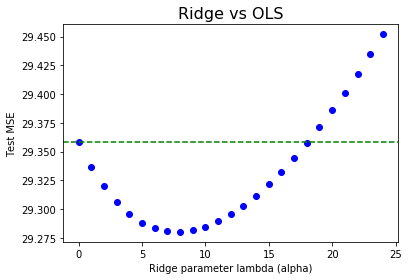

In [16]:
# Ordinary Least Squares (ols)
ols_mse = mean_squared_error(ybo_test, ybo_pred_lr)
#
MSEtestRR = list()
MSEtestRR.append(ols_mse)
#
Boston_coefRR = list()
Boston_coefRR.append(lr_boston.coef_)
#
for alpha in np.arange(1,25,1):
    rr_boston = Ridge(alpha)
    rr_boston.fit(Xbo_train, ybo_train)
    ybo_pred_rr = rr_boston.predict(Xbo_test)
    MSEtestRR.append(mean_squared_error(ybo_test, ybo_pred_rr))
    Boston_coefRR.append(rr_boston.coef_)
#
#
plt.plot(np.arange(0,25,1),MSEtestRR[:25],'ro',color='blue',label='data')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge vs OLS", fontsize=16)
plt.xlabel("Ridge parameter lambda (alpha)")
plt.ylabel("Test MSE")

In [17]:
PBoston_coef = pd.DataFrame(Boston_coefRR,columns=boston.feature_names)
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


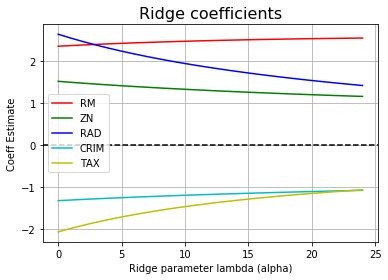

In [18]:
plt.plot(PBoston_coef.RM, 'r', PBoston_coef.ZN, 'g', PBoston_coef.RAD, 'b', PBoston_coef.CRIM, 'c', PBoston_coef.TAX, 'y')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Ridge coefficients", fontsize=16)
plt.xlabel("Ridge parameter lambda (alpha)")
plt.ylabel("Coeff Estimate")
plt.legend(labels=['RM','ZN','RAD','CRIM','TAX'])
#plt.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
plt.grid(True)

## Exercise 2 (The Lasso)

- Use the same Boston dataset, with same Train-test split, to perform the Lasso using the sklearn function. Use $\lambda = 1$ (the sklearn Lasso parameter is called alpha). Print the Mean Squared Error, $R^2$ and the coefficient values. What do you observe?


- As a second step, plot (i) the MSE test error and (ii) the values of feature coefficients, for $\lambda\in[0,0.3]$.


- Finally, compare the minimum Test MSE for Lasso, with the one for Ridge and the OLS. Which one is better?

note 1: To use Lasso, you need keep the **rescaled** data from before. 

note 2: Keep the same split of the dataset as above in a Train and a Test set.

note 3: The Lasso Regression parameter is 'alpha'. For documentation, see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

**Answer:**

- The Lasso

In [19]:
# Lasso: from the sklearn.linear_model library
la_boston = Lasso(alpha=1)
la_boston.fit(Xbo_train, ybo_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
ybo_pred_la = la_boston.predict(Xbo_test)

In [21]:
# The mean squared error
print("Mean_squared_error (Lasso): %.2f" % mean_squared_error(ybo_test, ybo_pred_la),'\n')
# Explained variance score: 1 is perfect prediction 
print('R2_score (Lasso): %.2f' % r2_score(ybo_test, ybo_pred_la),'\n')
# Coefficients
print('Coefficients (Lasso):', la_boston.coef_)

Mean_squared_error (Lasso): 34.85 

R2_score (Lasso): 0.64 

Coefficients (Lasso): [-0.          0.         -0.          0.         -0.          2.40090968
 -0.         -0.         -0.         -0.         -1.21154448  0.50995516
 -3.62280316]


The Test MSE is higher than the OLSs and the $R^2$ is smaller. Several coefficients are set to zero.

Text(0,0.5,'Test MSE')

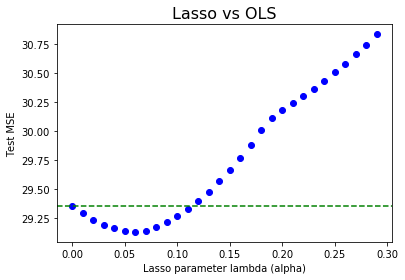

In [22]:
# Ordinary Least Squares (ols)
ols_mse = mean_squared_error(ybo_test, ybo_pred_lr)
#
MSEtestLA = list()
MSEtestLA.append(ols_mse)
#
Boston_coefLA = list()
Boston_coefLA.append(la_boston.coef_)
#
for alpha in np.arange(0.01,0.3,0.01):
    la_boston = Lasso(alpha)
    la_boston.fit(Xbo_train, ybo_train)
    ybo_pred_la = la_boston.predict(Xbo_test)
    MSEtestLA.append(mean_squared_error(ybo_test, ybo_pred_la))
    Boston_coefLA.append(la_boston.coef_)
#
#
plt.plot(np.arange(0,0.3,0.01),MSEtestLA,'ro',color='blue',label='data')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Lasso vs OLS", fontsize=16)
plt.xlabel("Lasso parameter lambda (alpha)")
plt.ylabel("Test MSE")

In [23]:
LBoston_coef = pd.DataFrame(Boston_coefLA,columns=boston.feature_names)
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


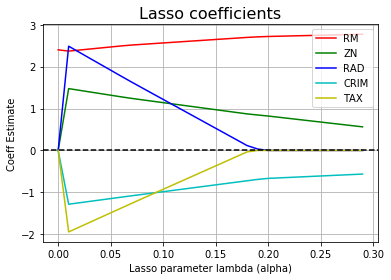

In [24]:
plt.plot(np.arange(0,0.3,0.01), LBoston_coef.RM, 'r')
plt.plot(np.arange(0,0.3,0.01), LBoston_coef.ZN, 'g')
plt.plot(np.arange(0,0.3,0.01), LBoston_coef.RAD, 'b')
plt.plot(np.arange(0,0.3,0.01), LBoston_coef.CRIM, 'c')
plt.plot(np.arange(0,0.3,0.01), LBoston_coef.TAX, 'y')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Lasso coefficients", fontsize=16)
plt.xlabel("Lasso parameter lambda (alpha)")
plt.ylabel("Coeff Estimate")
plt.legend(labels=['RM','ZN','RAD','CRIM','TAX'])
#plt.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
plt.grid(True)

In [25]:
# Min MSE test Lasso
print("MINIMUM test MSE (Lasso): %.2f" % min(MSEtestLA),'\n')
# Min MSE test Ridge
print("MINIMUM test MSE (Ridge): %.2f" % min(MSEtestRR),'\n')
# MSE test OLS
print("Test MSE (OLS): %.2f" % MSEtestLA[0],'\n')

MINIMUM test MSE (Lasso): 29.13 

MINIMUM test MSE (Ridge): 29.28 

Test MSE (OLS): 29.36 



Hence, in this example, Lasso outperforms Ridge and OLS, for the optimal choice of $\lambda$.

## Exercise 3 (bonus)

Repeat the comparison between OLS, Ridge and Lasso, using the two other datasets, i.e. 'load_diabetes', 'load_linnerud'

## Exercise 4 (Partial Least Squares)

Use the same dataset to perform Partial Least Squares (PLS). 

- Find the Test MSE for all possible number of linear-combinations of features. Use the Train-Test split as in the previous exercises. Which number $M\in 1,\ldots,p$ of elements gives the minimum Test MSE? Compare with OLS, Ridge, Lasso.

- Instead of a single Train-Test split, use the Cross-Validation framework, making use of the entire available trace. What number of linear combinations of the original features, $M\in 1,\ldots,p$ gives the optimal Test MSE result?

note 1: You will need the 'cross_validate' feature, from sklearn.model_selection : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for documentation.

note 2: You will need the 'PLSRegression' feature from sklearn.cross_decomposition : https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html for documentation.

**Answer:**

Text(0,0.5,'Test MSE')

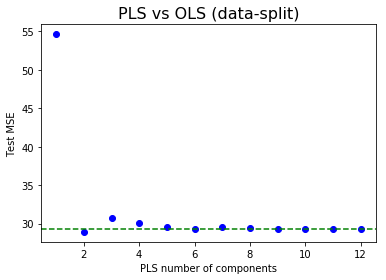

In [26]:
# We first use the same Train-Test split as before, with Test equal to 30% of the original dataset.
#
MSEtestPLS = []
for i in range(1,len(boston.feature_names)):
    pls = PLSRegression(n_components=i)
    pls.fit(Xbo_train,ybo_train)
    ybo_pred_PLS = pls.predict(Xbo_test)
    MSEtestPLS.append(mean_squared_error(ybo_test, ybo_pred_PLS))
#
#
plt.plot(np.arange(1,len(boston.feature_names)),MSEtestPLS,'ro',color='blue',label='data')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("PLS vs OLS (data-split)", fontsize=16)
plt.xlabel("PLS number of components")
plt.ylabel("Test MSE")

In [27]:
# Min MSE test Lasso
print("MINIMUM test MSE (Lasso): %.2f" % min(MSEtestLA),'\n')
# Min MSE test Ridge
print("MINIMUM test MSE (Ridge): %.2f" % min(MSEtestRR),'\n')
# MSE test OLS
print("Test MSE (OLS): %.2f" % MSEtestLA[0],'\n')
# Min MSE test PLS
print("MINIMUM test MSE (PLS): %.2f" % min(MSEtestPLS),'\n')

MINIMUM test MSE (Lasso): 29.13 

MINIMUM test MSE (Ridge): 29.28 

Test MSE (OLS): 29.36 

MINIMUM test MSE (PLS): 28.92 



Comparing with the other three methods we find that PLS gives the minimum Test MSE! It corresponds to the first two components!

Text(0,0.5,'Test MSE')

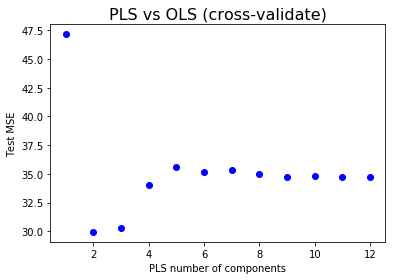

In [28]:
# We use Cross-Validation on the entire dataset.
#
MSEtestPLScv = []
for i in range(1,len(boston.feature_names)):
    pls = PLSRegression(n_components=i)
    scores = cross_validate(pls, Xboston, Yboston, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=False)
    # Average over the Kfold (K=10):
    MSEtestPLScv.append(-np.sum(scores['test_neg_mean_squared_error'])/len(scores['test_neg_mean_squared_error']))
#
#
plt.plot(np.arange(1,len(boston.feature_names)),MSEtestPLScv,'ro',color='blue',label='data')
plt.title("PLS vs OLS (cross-validate)", fontsize=16)
plt.xlabel("PLS number of components")
plt.ylabel("Test MSE")